In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
train = pd.read_csv(r'C:\Users\Luis\titanic_train.csv')
#uploading train data frame.

In [3]:
train.info()
#here we have 891 entries; some missing values on 'Embarked', 'Age' and 'Cabin'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

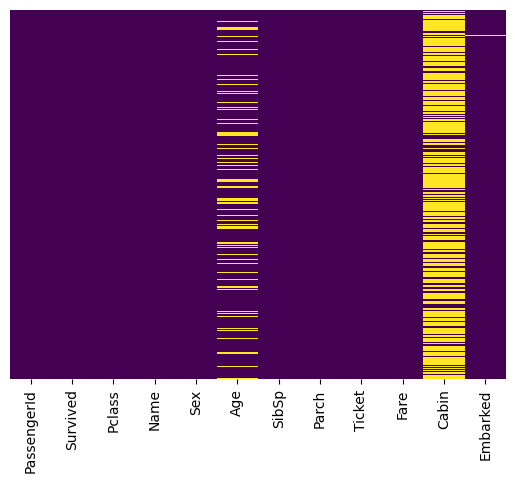

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#visualization for missing values on our data; we can work on 'Age' and 'Embarked', 'Cabin' will probably not be useful.

<Axes: xlabel='Pclass', ylabel='Age'>

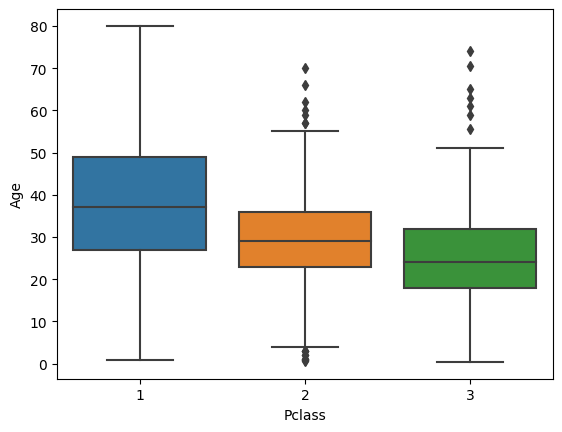

In [5]:
sns.boxplot(x='Pclass',y='Age',data=train)
#here we can see a correlation between 'Pclass' and 'Age', where people on first class tend to be older than third class.
#we can use that to treat our missing data on 'Age'.

In [6]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else: 
        return(Age)
    
#this function will replace missing values on 'Age' based on the class where they are (mean values on 'Pclass').

In [7]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

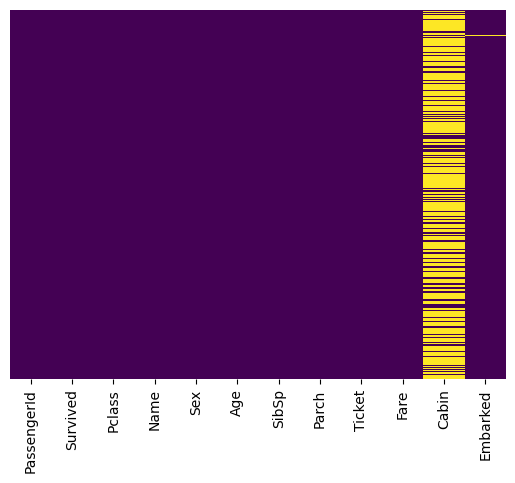

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#now we have no longer missing information on 'Age'

In [9]:
train.drop('Cabin',axis=1,inplace=True)
#removing 'Cabin' column since we have the majority of data as null

In [10]:
train.dropna(inplace=True)
#removing the 2 missing values on 'Embarked'

<Axes: >

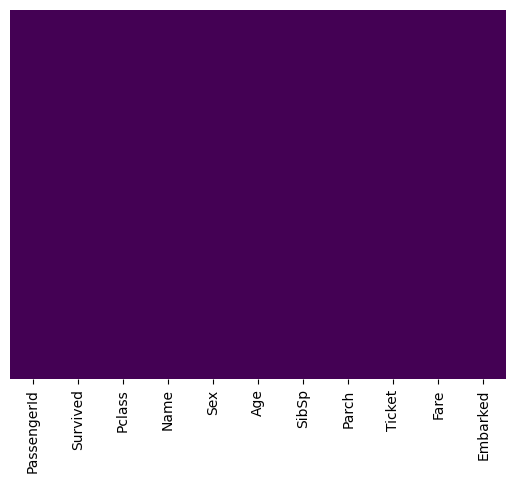

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#now we have no missing values anymore.

In [12]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
#'Sex' and "Embark' are string values that cannot be read well by the algorithm, but we can replace them for binary variables.

In [13]:
train = pd.concat([train,sex,embark],axis=1)
#add new binary columns on data train:

In [14]:
train.drop(['Sex','Embarked'],axis=1,inplace=True)
#remove old columns.
train.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)
#remove columns that cannot be interpreted by our algorithm.

In [27]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [16]:
x = train.drop('Survived',axis=1) # x will be the data to predict y.
y = train['Survived'] # y is the result variable for train.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
# x_train and y_train will be used to train our algorithm
# x_test and y_test will be used to test our algorithm and see the accuracy of the results.

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logmodel = LogisticRegression()

In [21]:
logmodel.fit(x_train,y_train)
#fit the data into our model.

C:\Users\Luis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
predictions = logmodel.predict(x_test)
#predict the model.

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_test,predictions)

array([[163,  21],
       [ 38,  72]], dtype=int64)

In [47]:
print(classification_report(y_test,predictions))
# using 66% of our training data, we got 80% accuracy on the test split.
# now that we've seen that the model works, we can use the full training data do predict our real test data.

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       184
           1       0.77      0.65      0.71       110

    accuracy                           0.80       294
   macro avg       0.79      0.77      0.78       294
weighted avg       0.80      0.80      0.80       294



In [56]:
test = pd.read_csv(r'C:\Users\Luis\titanic_test.csv')
#uploading test data frame.

In [57]:
test.info()
# 418 entries; missing values on 'Age', 'Fare' and 'Cabin'.
# use same data treatment as in our training data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [58]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [76]:
test.dropna(inplace=True)

In [59]:
test.drop('Cabin',axis=1,inplace=True)

In [60]:
sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embark_test = pd.get_dummies(test['Embarked'],drop_first=True)

In [61]:
test = pd.concat([test,sex_test,embark_test],axis=1)

In [62]:
test.drop(['Sex','Embarked'],axis=1,inplace=True)
test.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [77]:
test.info()
test.head()
# test data ready to run

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  417 non-null    int64  
 1   Age     417 non-null    float64
 2   SibSp   417 non-null    int64  
 3   Parch   417 non-null    int64  
 4   Fare    417 non-null    float64
 5   male    417 non-null    bool   
 6   Q       417 non-null    bool   
 7   S       417 non-null    bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 20.8 KB


,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,True,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,True,True,False
3,3,27.0,0,0,8.6625,True,False,True
4,3,22.0,1,1,12.2875,False,False,True


In [71]:
x_final_train = train.drop('Survived',axis=1) 
y_final_train = train['Survived'] 
# separating explanatory variables and outcome values.

In [72]:
logmodel_final = LogisticRegression()
# creating model

In [74]:
logmodel_final.fit(x_final_train,y_final_train)
# filling the data into the model.

C:\Users\Luis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
final_predictions = logmodel_final.predict(test)
# receiving the predicted values.

In [80]:
df = pd.DataFrame(final_predictions, columns=['Survived'])
# converting values into a data frame.

In [82]:
filled_test = pd.concat([test,df],axis=1)
# filling values in test data frame.

In [89]:
df.sum()
#number of passengers who survived: 156 of 417

Survived    156
dtype: int64

In [101]:
filled_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,3.0,34.5,0.0,0.0,7.8292,True,True,False,0.0
1,3.0,47.0,1.0,0.0,7.0000,False,False,True,0.0
2,2.0,62.0,0.0,0.0,9.6875,True,True,False,0.0
3,3.0,27.0,0.0,0.0,8.6625,True,False,True,0.0
4,3.0,22.0,1.0,1.0,12.2875,False,False,True,1.0


In [ ]:
filled_test.to_csv(r'C:\Users\Luis.csv', index=False)
# export back to csv.